In [14]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew, boxcox
import matplotlib.pyplot as plt
#matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv",header=0)
test = pd.read_csv("data/test.csv",header=0)

In [3]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
print(train.shape)
print(test.shape)

(188318, 132)
(125546, 131)


In [5]:
test['loss'] = -1

In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,4,A,B,A,A,A,A,A,A,B,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,-1
1,6,A,B,A,B,A,A,A,A,B,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,-1
2,9,A,B,A,B,B,A,B,A,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,-1
3,12,A,A,A,A,B,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,-1
4,15,B,A,A,A,A,B,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,-1


In [7]:
data = train.append(test)

In [8]:
data = data.sort_values('id')

In [9]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
0,4,A,B,A,A,A,A,A,A,B,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,-1.00
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
1,6,A,B,A,B,A,A,A,A,B,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,-1.00


Data has 132 columns:
  1 col is the id
  1 col is the loss
  14 cols are continious features: They are all between 0 and 1
  116 cols are categorical features: 139 different categories
  ['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
   'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
   'AV', 'AW', 'AX', 'AY', 'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF',
   'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ',
   'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'C', 'CA', 'CB',
   'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM',
   'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX',
   'CY', 'D', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
   'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT',
   'DU', 'DV', 'DW', 'DX', 'DY', 'E', 'EA', 'EB', 'ED', 'EE', 'EF',
   'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'F', 'G', 'H', 'I',
   'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
   'W', 'X', 'Y', 'ZZ']
  
No missing values

In [10]:
binary = data.loss == -1
data['binary'] = binary

/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


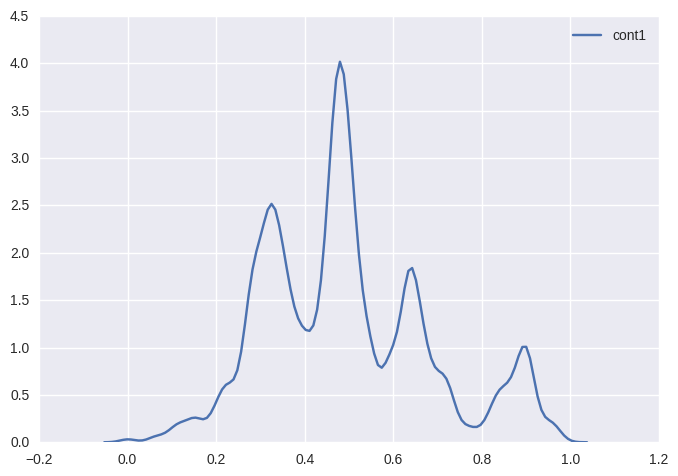

In [12]:
sns.kdeplot(train.cont1)
plt.show()

/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


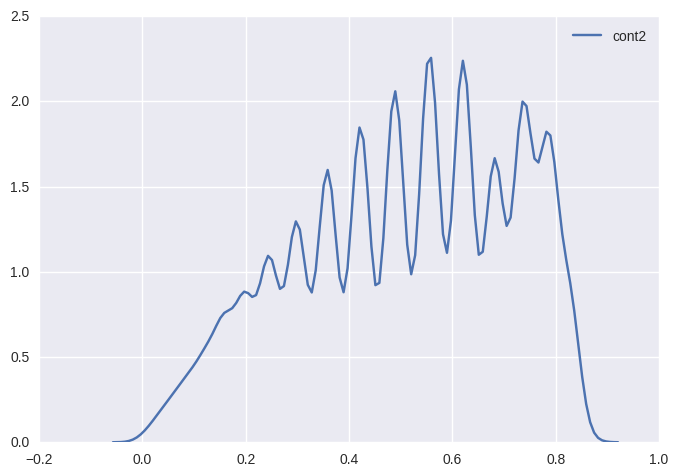

-0.3109387746379355
-0.24245402280065098


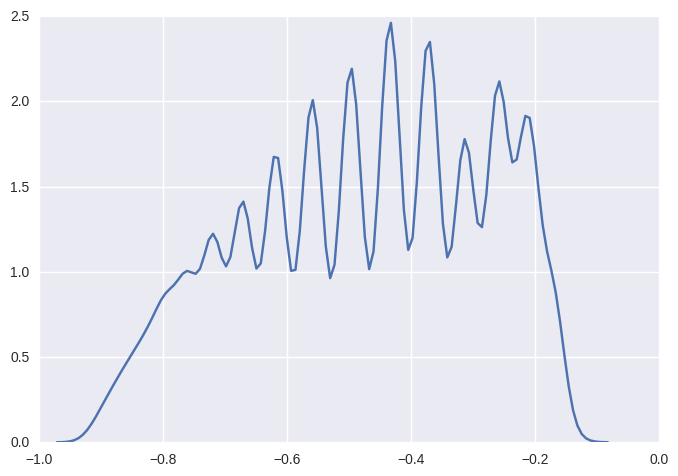

In [33]:
sns.kdeplot(train.cont2)
plt.show()
print(skew(train.cont2))
f1 = boxcox(train.cont2)
print(skew(f1[0]))
sns.kdeplot(f1[0])
plt.show()

In [13]:
for col in ['cont'+str(x) for x in range(1,15)]:
    fig = plt.figure()
    #sns.lmplot(data=data,hue='binary',x=col,y='loss',fit_reg=False)
    sns.kdeplot(train[col])
    plt.savefig('plots/'+col+'_kde.png', bbox_inches='tight')
    plt.close(fig)

/home/jan/anaconda3/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [15]:
numeric_feats = ['cont'+str(x) for x in range(1,15)]
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats

cont1     0.516420
cont2    -0.310939
cont3    -0.010002
cont4     0.416093
cont5     0.681617
cont6     0.461211
cont7     0.826046
cont8     0.676629
cont9     1.072420
cont10    0.354998
cont11    0.280819
cont12    0.291990
cont13    0.380739
cont14    0.248672
dtype: float64

In [11]:
cats = []
for col in ['cat'+str(x)for x in range(1,116)]:
    cats.extend(data[col].values)
cats = pd.Series(cats).unique()

In [12]:
print(cats.shape)
cats.sort()
cats

(139,)


array(['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF',
       'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ',
       'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'C', 'CA', 'CB',
       'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM',
       'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX',
       'CY', 'D', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI',
       'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT',
       'DU', 'DV', 'DW', 'DX', 'DY', 'E', 'EA', 'EB', 'ED', 'EE', 'EF',
       'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'ZZ'], dtype=object)

In [15]:
for col in ['cat'+str(x)for x in range(1,117)]:
    fig = plt.figure()
    sns.boxplot(y='loss',x=col,data=data)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.savefig('plots/'+col+'_box.png', bbox_inches='tight')
    plt.close(fig)

ValueError: Could not interpret input 'cat117'